# Shopping Mall Customers Segment

### &emsp;&emsp; The goal is to obtain different customer groups for the shopping mall.

# Data Description:-

* <b>Customer ID</b>: The id for each customer.
* <b>Gender</b>: The gender of the customer.
* <b>Age</b>: The age of the customer
* <b>Annual Income</b>: Annual income of the customer.
* <b>Spending Score (1-100)</b>: The score given to a customer by the shopping mall authorities, based on the money spent and the behavior of the customer.

*******************************************
*******************************************

In [1]:
## Font Style
BOLD   = "\033[1m"
RESET  = "\033[0m"

RED    = "\033[31m"
GREEN = "\033[32m"
CYAN    = "\033[36m"

# Libraries:-

In [2]:
import pandas as pd
import numpy as np

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset & Removing duplicate rows if any:-

In [4]:
Shopping_Mall_Data = pd.read_csv('C:\\Users\\Pranab_Kumar_Paul\Desktop\\Python_Script\\My_Script\\Python_Project(GitHub)\\Cluster\\Mall_Customers.csv', encoding='latin')
print(BOLD, 'Shape before deleting duplicate values:', Shopping_Mall_Data.shape, RESET)

# Removing duplicate rows if any
Shopping_Mall_Data= Shopping_Mall_Data.drop_duplicates()
print(BOLD, 'Shape After deleting duplicate values:', Shopping_Mall_Data.shape, RESET)

# Data Backup
DATA_BACKUP= Shopping_Mall_Data

print(BOLD, 'So this file contains {} customer details.'.format(len(Shopping_Mall_Data.index)), RESET)

# Printing sample data
Shopping_Mall_Data.head(10)

 Shape before deleting duplicate values: (200, 5) 
 Shape After deleting duplicate values: (200, 5) 
 So this file contains 200 customer details. 


,Customer ID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# Renaming Column

In [5]:
Shopping_Mall_Data.rename(columns = {'Annual Income (k$)':'Annual_Income',
                                     'Spending Score (1-100)': 'Spending_Score',
                                     'Customer ID':'Customer_ID'}, inplace = True)
# Printing sample data
Shopping_Mall_Data.head()

,Customer_ID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Basic Data Exploration:-

In [6]:
# Observing data types, Number of Missing values, Total rows etc.
Shopping_Mall_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer_ID     200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [7]:
# Observing Descriptive statistics of the data
Shopping_Mall_Data.describe(include='all')

,Customer_ID,Gender,Age,Annual_Income,Spending_Score
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [8]:
# Finding unique values for each column, to get a idea of which column is categorical and which one is Continuous.
Shopping_Mall_Data.nunique()

Customer_ID       200
Gender              2
Age                51
Annual_Income      64
Spending_Score     84
dtype: int64

# Basic Data Exploration Results:-

* <b>Customer_ID</b>: This column will not help in analysis. **Rejected**.
* <b>Gender</b>: Customer segmention can not be done depending upon Gender column. There are Males & Femails who spend more also there are males & &emsp;&emsp;&emsp;&emsp;Femails who spend less. **Rejected**.
* <b>Age</b>: Continuous. Selected.
* <b>Annual_Income</b>: Continuous. Selected.
* <b>Spending_Score</b>: Continuous. Selected.

# Creating Variable:-

In [9]:
# All Continuous Column
CONTINUOUS_COLUMN_NAMES= ['Age', 'Annual_Income', 'Spending_Score']

# Useless Columns
Useless_Columns = ['Customer_ID','Gender']

# Removing useless columns from the data:-

In [10]:
# Deleting the useless column.
Shopping_Mall_Data = Shopping_Mall_Data.drop(Useless_Columns,axis=1)

# Sample Data.
Shopping_Mall_Data.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# Missing values treatment:-

In [11]:
# Finding how many missing values are there for each column
Shopping_Mall_Data.isnull().sum()

Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

### &emsp;&emsp; There is no missing value.

# Visual Exploratory Data Analysis:-

### &emsp;&emsp; 1. Histogram for Continuous variable:

In [12]:
# Creating a function which can plot all the Histogram at once.
def plot_hist_charts(HIST_inpdata,HIST_column_name):    
    %matplotlib inline
    total_rows= 1
    try:
        HIST_inpdata.hist(column= CONTINUOUS_COLUMN_NAMES, figsize=(16,6), layout=(total_rows,int(np.ceil(len(CONTINUOUS_COLUMN_NAMES)/total_rows))))
        plt.suptitle('Histogram of :-'+ str(CONTINUOUS_COLUMN_NAMES), fontsize = 20)
        plt.show()
    except:
        print('Some thing is #### WRONG ####')

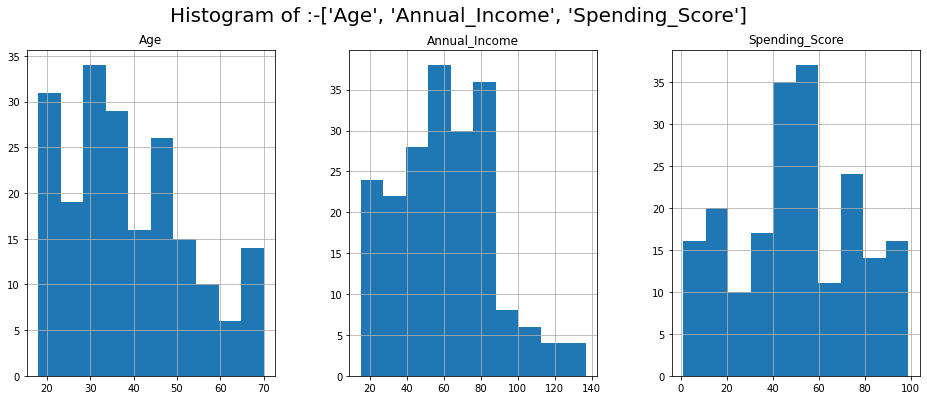

In [13]:
# Calling the function to plot all the Histogram at once.
plot_hist_charts(HIST_inpdata= Shopping_Mall_Data, HIST_column_name= CONTINUOUS_COLUMN_NAMES)

### &emsp;&emsp; 2. Correlation between the parameters.

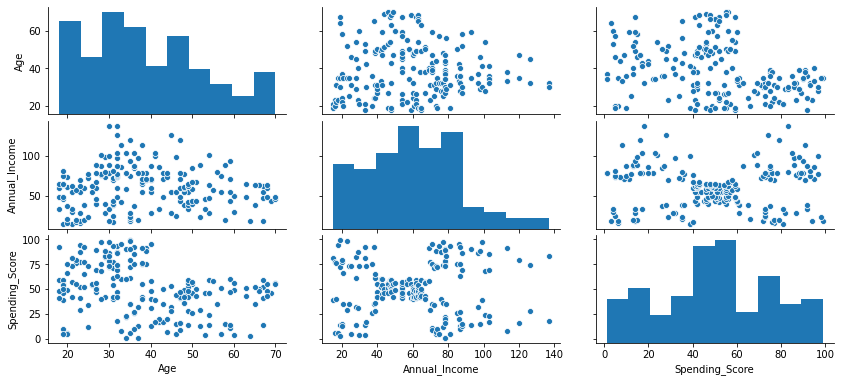

In [14]:
A= sns.pairplot(Shopping_Mall_Data, kind='scatter')
A.fig.set_size_inches(12,5)
plt.show()

## Visual Exploration Results:-

* <b>Age</b>: No relationship found between Age & Annual_Income or Age & Spending_Score.
* <b>Annual_Income</b>: It's an independent variable. **Selected**.
* <b>Spending_Score</b>: It's dependent on Annual_Income. It can be low or high based on requirement or seasonality. So, it is not fixed. **Selected**.

# Descriptive statistics :-

In [15]:
# Creating a function which give descriptive statistics.
def descriptive_statistics(DF_name, column_name):
    column_data= DF_name[column_name]    
    if column_data.dtype == "int64" or column_data.dtype == "float64":
        data_frame= pd.DataFrame([[column_name, np.mean(column_data), np.median(column_data), np.std(column_data), np.var(column_data)]], 
                            columns = ["Variable Name", "Mean", "Median", "Standard Deviation", "Variance"])
        return data_frame.style.hide_index()    
    else:
        return pd.DataFrame(column_data.value_counts())  

In [16]:
# Call the function for column wise descriptive statistics
for i in CONTINUOUS_COLUMN_NAMES:
    display(descriptive_statistics(DF_name= Shopping_Mall_Data, column_name= i))   

Variable Name,Mean,Median,Standard Deviation,Variance
Age,38.850000,36.000000,13.934041,194.157500


Variable Name,Mean,Median,Standard Deviation,Variance
Annual_Income,60.560000,61.500000,26.198977,686.386400


Variable Name,Mean,Median,Standard Deviation,Variance
Spending_Score,50.200000,50.000000,25.758882,663.520000


# Saving the data for reference during deployment:-

In [17]:
DataForML= Shopping_Mall_Data[['Annual_Income', 'Spending_Score']]
DataForML.to_pickle('DataForML.pkl')

# Printing sample rows
DataForML.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Generating the input values for the model.

In [18]:
# Printing sample rows
X=DataForML.values
X[:4]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77]], dtype=int64)

# Standardization/Normalization of data:-

In [19]:
### Sandardization of data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Printing sample values.
X[:4]

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ]])

# KMeans Clustering

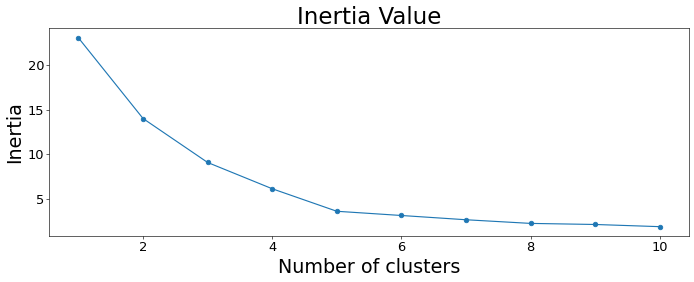

In [20]:
# Finding the best number of clusters based on the inertia value.
from sklearn.cluster import KMeans
inertiaValue = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)    
    km.fit(X)
    inertiaValue.append(km.inertia_)

%matplotlib inline
fig= plt.figure(figsize= (15,5), dpi= 55)
plt.plot(range(1, 11), inertiaValue, marker='o')

plt.xlabel('Number of clusters', fontsize= 25)
plt.ylabel('Inertia', fontsize= 25)

plt.xticks(fontsize= 17)
plt.yticks(fontsize= 17)

plt.title("Inertia Value",fontsize= 30)
plt.show()

## &emsp; Using above graph the optimal number of clusters are 5.
## Clustering with 5 clusters.

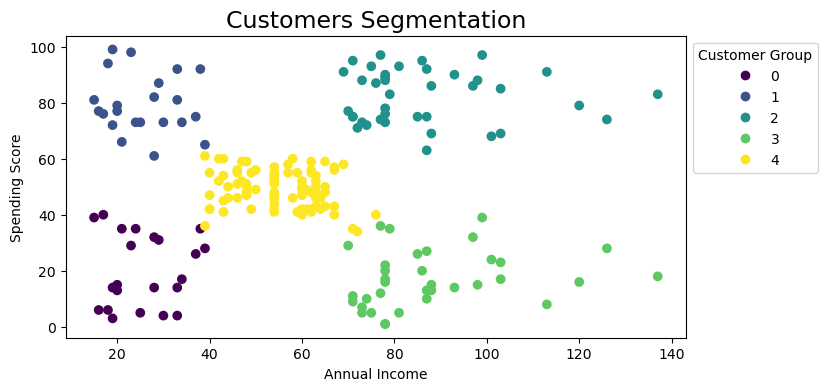

In [21]:
# Defining the K-Means object for best number of clusters.
km = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=3)
predicted_Cluster = km.fit_predict(X)

# Plot K-Means.
%matplotlib inline
fig= plt.figure(figsize= (8,4), dpi= 100)
A= plt.scatter(x=Shopping_Mall_Data['Annual_Income'], y=Shopping_Mall_Data['Spending_Score'], c= predicted_Cluster)
plt.title('Customers Segmentation', fontsize= 17)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.legend(handles= A.legend_elements()[0], labels= [str(i) for i in set(predicted_Cluster)],title = "Customer Group",bbox_to_anchor=(1,1), loc="upper left")
plt.show()

## Observation:-
#### &emsp;&emsp;&emsp; 1. In the group of Annual Income between 0 to 40, a few customers are having low Spending Score (0 to 40) & a few customers are having &emsp;&emsp;&emsp;&emsp; high Spending Score (60 to 100) . <br><br>&emsp;&emsp;&emsp; 2. In the group of Annual Income between 40 to 80, a few customers are having medium Spending Score (40 to 60). <br><br>&emsp;&emsp;&emsp; 3. In the group of Annual Income between 70 to 140, a few customers are having low Spending Score (0 to 40) & a few customers are having &emsp;&emsp;&emsp;&emsp; high Spending Score (60 to 100) .

In [22]:
# Running the clustering algorithm on the data set
predicted_Cluster = km.fit_predict(X)
print(predicted_Cluster)
print('\n __Inertia:__', km.inertia_)

## Creating cluster id.
Shopping_Mall_Data['KMeans_Cluster_ID']=predicted_Cluster
Shopping_Mall_Data.head(10)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 4 4 0 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 3 2 4 2 3 2 3 2 4 2 3 2 3 2 3 2 3 2 4 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]

 __Inertia:__ 3.5834407128859715


,Age,Annual_Income,Spending_Score,KMeans_Cluster_ID
0,19,15,39,0
1,21,15,81,1
2,20,16,6,0
3,23,16,77,1
4,31,17,40,0
5,22,17,76,1
6,35,18,6,0
7,23,18,94,1
8,64,19,3,0
9,30,19,72,1


****
****

# Hierarchical Clustering

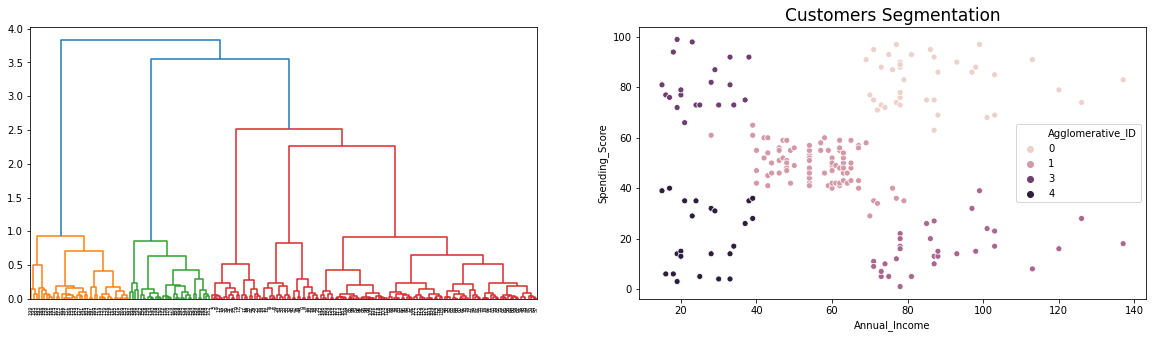

,Age,Annual_Income,Spending_Score,KMeans_Cluster_ID,Agglomerative_ID
0,19,15,39,0,4
1,21,15,81,1,3
2,20,16,6,0,4
3,23,16,77,1,3
4,31,17,40,0,4


In [23]:
%matplotlib inline
fig, subPlots=plt.subplots(nrows=1, ncols=2, figsize=(20,5))

# create dendrogram to find best number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), ax=subPlots[0])

##################################################################
# Creating 5 Clusters Based on the dendogram visually
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

# Generating cluster id for each row using agglomerative algorithm
Shopping_Mall_Data['Agglomerative_ID']= hc.fit_predict(X)
 
### Plotting the predicted clusters
sns.scatterplot(x='Annual_Income', y='Spending_Score',data= Shopping_Mall_Data, hue= Shopping_Mall_Data['Agglomerative_ID'])
plt.title('Customers Segmentation', fontsize= 17)
plt.show()

Shopping_Mall_Data.head()

## Finding Best number of clusters for Hierarchical Clustering using Silhouette Coefficient.

In [24]:
## Finding Optimal Number of clusters using silhouette score
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Defining the list of clusters to try
n_clusters_list= np.arange(start=2, stop=10, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data= pd.DataFrame()

for n_clusters_trial in n_clusters_list:   
        
    # Generating Hierarchical clusters    
    hc = AgglomerativeClustering(n_clusters= n_clusters_trial, affinity= 'euclidean', linkage= 'ward')
        
    if(len(np.unique(hc.fit_predict(X)))>1):
        sil_score= silhouette_score(X, hc.fit_predict(X))
    else:
        continue
    
    # Appending the result of each iteration
    silhouette_scores_data= silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,n_clusters_trial]], 
                                                                          columns=["score", "Clusters"]))
silhouette_scores_data

,score,Clusters
0,0.390901,2
0,0.447962,3
0,0.497642,4
0,0.558270,5
0,0.529667,6
0,0.409308,7
0,0.410551,8
0,0.417721,9


In [25]:
# Finding out the best nmber of clusters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

,score,Clusters
0,0.55827,5


******
******

# DBSCAN

In [26]:
## Finding best values of eps and min_samples for DBSCAN.
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# Defining the list of hyperparameters to try
eps_list=np.arange(start=0.1, stop=0.9, step=0.001)
min_sample_list=np.arange(start=2, stop=8, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()

for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(X)))>1):
            sil_score=silhouette_score(X, db.fit_predict(X))
        else:
            continue
        trial_parameters="eps:- " + str(eps_trial.round(1)) +" min_sample:- " + str(min_sample_trial)
        
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], 
                                                                          columns=["score", "parameters"]))
# silhouette_scores_data

In [27]:
# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

,score,parameters
0,0.422354,eps:- 0.1 min_sample:- 7



 #### So, the optimal number of clusters are 5.


,Age,Annual_Income,Spending_Score,KMeans_Cluster_ID,Agglomerative_ID,DBSCAN_ID
0,19,15,39,0,4,1
1,21,15,81,1,3,1
2,20,16,6,0,4,0
3,23,16,77,1,3,1
4,31,17,40,0,4,1


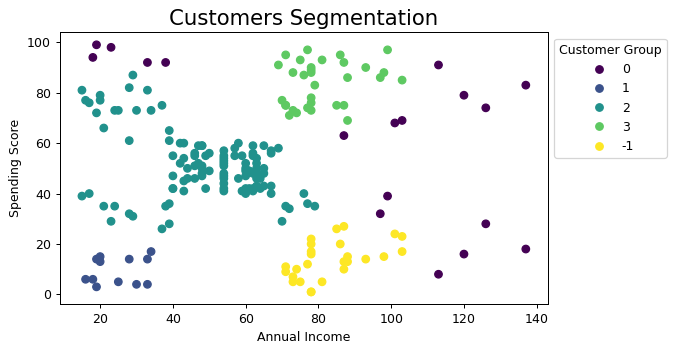

In [28]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=7)

Shopping_Mall_Data['DBSCAN_ID']=db.fit_predict(X)
# print(Shopping_Mall_Data.head())

# Plotting the predicted clusters
fig= plt.figure(figsize= (7,4), dpi= 90)
A= plt.scatter(x=Shopping_Mall_Data['Annual_Income'], y=Shopping_Mall_Data['Spending_Score'], c=Shopping_Mall_Data['DBSCAN_ID'])
plt.title('Customers Segmentation', fontsize= 17)
plt.legend(handles= A.legend_elements()[0], labels= [str(i) for i in set(Shopping_Mall_Data['DBSCAN_ID'])], title = "Customer Group",bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

print('\n #### So, the optimal number of clusters are {}.'.format(len(set(Shopping_Mall_Data['DBSCAN_ID']))))
Shopping_Mall_Data.head()

# Deployment of the Model:-
### When a new customer will come it will be able to predict the group.

### &emsp; Retraining the model 5 number of clusters.

In [29]:
# Defining the K-Means object for best number of clusters.
km = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=3)
Final_KMeans_Model= km.fit(X)

## Save the model as a serialized file which can be stored anywhere:-

In [30]:
import pickle
import os

# Saving the Python objects as serialized files.

with open('Final_KMeans_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_KMeans_Model, fileWriteStream)
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Pranab_Kumar_Paul\Desktop\Python_Script\My_Script\Python_Project(GitHub)\Cluster


## Create a python function:-

In [31]:
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs= InputData.shape[0]
    
    # Appending the new data with the Training data
    DataForML= pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Generating the input values to the model
    X=InputData.values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    PredictorScaler= MinMaxScaler()
    PredictorScalerFit= PredictorScaler.fit(X)
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_KMeans_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction= PredictionModel.predict(X)
    PredictionResult= pd.DataFrame(Prediction, columns=['Predicted Cluster ID'])
    return(PredictionResult)

In [32]:
# Calling the function for some new case to test
NewSampleData=pd.DataFrame(
                        data=[[15,39],
                              [20,80]],
                     columns=['Annual_Income', 'Spending_Score'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   Annual_Income  Spending_Score
0             15              39
1             20              80


,Predicted Cluster ID
0,0
1,2


# Deploying a predictive model as an API:-
## - Function for predictions API

In [33]:
# Creating the function which can take inputs and return predictions
def FunctionGeneratePrediction(inp_Annual_Income, inp_Spending_Score):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame( data= [[inp_Annual_Income, inp_Spending_Score]], 
                                 columns= ['Annual_Income', 'Spending_Score'])
    
    # Calling the function defined above using the input parameters
    Predictions= FunctionPredictResult(InputData= SampleInputData)
        
    # Returning the predictions
    return(Predictions.to_json())

# Calling the Function
FunctionGeneratePrediction(inp_Annual_Income= 15, inp_Spending_Score= 39 )

'{"Predicted Cluster ID":{"0":0}}'

# Creating Flask API:-

In [34]:
#!pip install flask

from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [35]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        Annual_Income_value= float(request.args.get('Annual_Income'))
        Spending_Score_value= float(request.args.get('Spending_Score'))
              
        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                    inp_Annual_Income=Annual_Income_value,
                                                    inp_Spending_Score=Spending_Score_value,
                                                     )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

# Starting the API engine:-

In [36]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)


# Sample URL to call the API:-

#### Copy and paste below URL in the web browser
http://127.0.0.1:8080/prediction_api?Annual_Income=16&Spending_Score=6